In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from networkx.algorithms.bipartite import color
from scipy.special import label

from sklearn.model_selection import train_test_split # to separate data into train and test
from sklearn.linear_model import LinearRegression # to build linear regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # to evaluate the model

data = pd.read_excel("data/icecream.xlsx")
data.head()

,Temperatura,Vendas_Sorvetes
0,26,268.125258
1,39,403.562400
2,34,339.279899
3,30,310.035329
4,27,273.616360


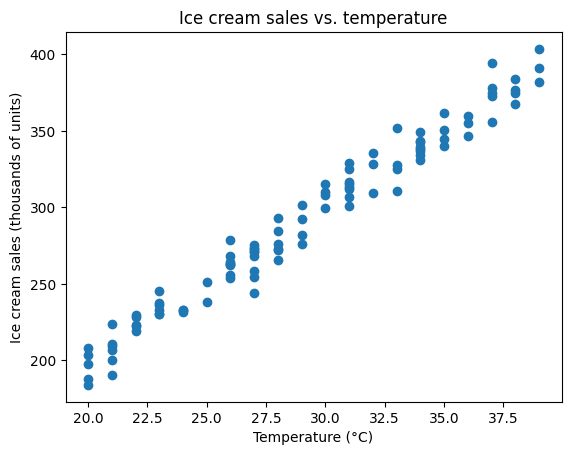

In [3]:
plt.scatter(data["Temperatura"], data["Vendas_Sorvetes"])
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice cream sales (thousands of units)")
plt.title("Ice cream sales vs. temperature")
plt.show()

In [4]:
data.corr()

,Temperatura,Vendas_Sorvetes
Temperatura,1.000000,0.985589
Vendas_Sorvetes,0.985589,1.000000


In [5]:
X = data[["Temperatura"]] # feature
y = data["Vendas_Sorvetes"] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% for test

In [7]:
# train the model
model = LinearRegression()
model.fit(X_train, y_train) # fit the model

# evaluate the model
prediction = model.predict(X_test)

In [8]:
mean_squared_error = mean_squared_error(y_test, prediction) # lower is better.
mean_absolute_error = mean_absolute_error(y_test, prediction) # lower is better. 
r2_score = r2_score(y_test, prediction) # higher is better. Near 1 is best

print(f"Mean squared error: {mean_squared_error}")
print(f"Mean absolute error: {mean_absolute_error}")
print(f"R2 score: {r2_score}")

Mean squared error: 101.64524989805876
Mean absolute error: 7.6809927436910055
R2 score: 0.9594169633031285


In [ ]:
plt.scatter(X_test, y_test, label="Real data")
plt.scatter(X_test, prediction, label="Predicted data", color="red")
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice cream sales (thousands of units)")
plt.title("Ice cream sales vs. temperature")
plt.legend()
plt.show()
